# Create Images with Amazon Titan Image Generator

In [2]:
import boto3
import json
import base64
from PIL import Image
from io import BytesIO
from datetime import datetime

In [3]:

bedrock = boto3.client(service_name="bedrock")
bedrock_runtime = boto3.client(service_name="bedrock-runtime")

## List Bedrock Models by Provider

In [4]:
response = bedrock.list_foundation_models(
    byProvider="amazon",
    byOutputModality="IMAGE",
)

In [5]:
for model in response["modelSummaries"]:
    print("-----\n" + "modelArn: " + model["modelArn"] + "\nmodelId: " + model["modelId"] + "\nmodelName: " + model["modelName"] + "\ncustomizationsSupported: " + ','.join(model["customizationsSupported"]))

-----
modelArn: arn:aws:bedrock:us-east-1::foundation-model/amazon.titan-image-generator-v1
modelId: amazon.titan-image-generator-v1
modelName: Titan Image Generator G1
customizationsSupported: 


# Create Images

In [6]:
model_id = 'amazon.titan-image-generator-v1'

## Example: Text to Image
ImageGenerationConfig Options:
* numberOfImages: Number of images to be generated
* quality: Quality of generated images, can be standard or premium
* height: Height of output image(s)
* width: Width of output image(s)
* cfgScale: Scale for classifier-free guidance
* seed: The seed to use for re-producibility  

In [7]:
body = json.dumps(
    {
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {
            "text": "Generate a green iguana on a tree branch.",   # Required
            # "negativeText": "<text>"  # Optional
        },
        "imageGenerationConfig": {
            "numberOfImages": 1,      # Range: 1 to 5 
            "quality": "premium",     # Options: standard/premium
            "height": 768,
            "width": 1280,
            "cfgScale": 7.5,          # Range: 1.0 (exclusive) to 10.0
            "seed": 42                # Range: 0 to 214783647
        }
    }
)

In [8]:
accept = "application/json"
contentType = "application/json"

In [9]:
%%time
response = bedrock_runtime.invoke_model(
    body=body, modelId=model_id, accept=accept, contentType=contentType
)
response_body = json.loads(response.get("body").read())

CPU times: user 12.9 ms, sys: 17.8 ms, total: 30.7 ms
Wall time: 13.6 s


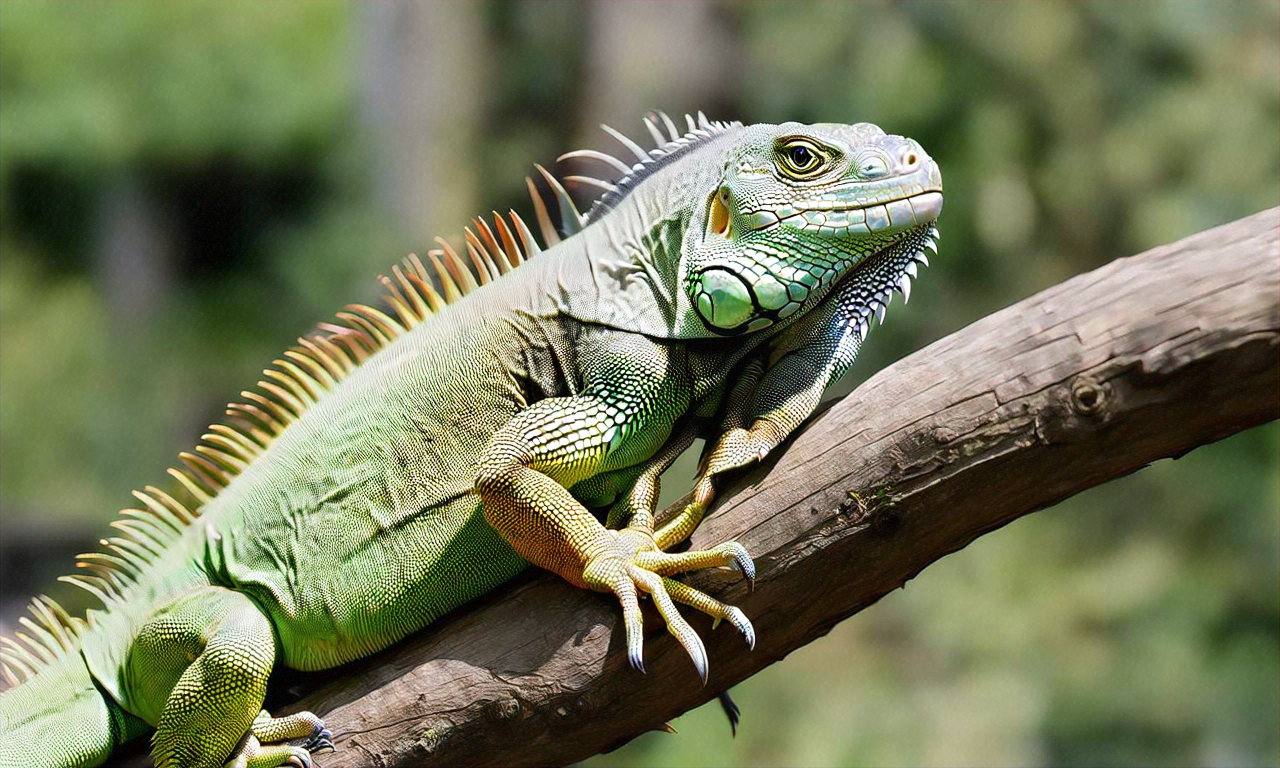

In [10]:
images = [Image.open(BytesIO(base64.b64decode(base64_image))) for base64_image in response_body.get("images")]
for img in images:
    img.save("data/iguana.png")
    display(img)